In [1]:
# import required libraries

import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir_path = "/content/drive/MyDrive/Colab"
file_path = dir_path + "/food-images.zip"
!unzip $file_path

In [3]:
# create dataset from directory containing sample images
# directory is structured as class1/ class2/ ..
# each containing sample images for that class

train_data, valid_data = keras.utils.image_dataset_from_directory(
    "food-images",
    labels = "inferred",
    class_names=('burger', 'cake', 'juice', 'noodles', 'pizza'),
    image_size=(224,224),
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=1337)

Found 1479 files belonging to 5 classes.
Using 1184 files for training.
Using 295 files for validation.


In [4]:
# load pre-trained model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# pre-trained model is not re-trained
# as its already trained on very large scale dataset

base_model.trainable = False

In [8]:
num_classes = 5
class_labels = ['burger', 'cake', 'juice', 'noodles', 'pizza']

In [6]:
# build new model on top of pre-trained model

from keras import layers

# add new layers to base_model
model = keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 320s 8s/step - loss: 0.9520 - val_loss: 0.1847
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 328s 9s/step - loss: 0.0696 - val_loss: 0.1218
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 314s 8s/step - loss: 0.0269 - val_loss: 0.1255


In [9]:
# load test images
test_sample = []

for k in range(25):
  img_file = str(k+1) + ".jpg"
  test_img = keras.utils.load_img(img_file, target_size=(224,224))
  test_sample.append(test_img)

np.array(test_sample).shape


(25, 224, 224, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


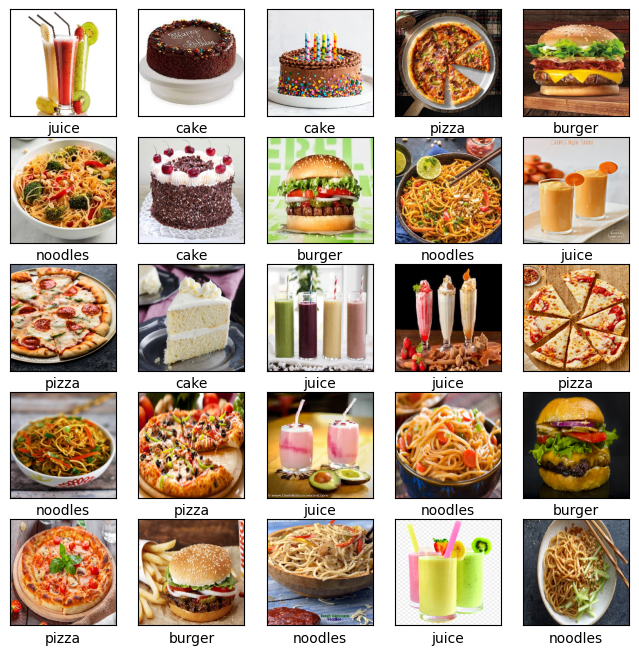

In [10]:
# run model predictions
y = model.predict(np.array(test_sample))

# plot model output on test images
plt.figure(figsize=(8,8))

for k in range(25):
  plt.subplot(5, 5, k+1)
  plt.imshow(test_sample[k])

  label = class_labels[np.argmax(y[k])]
  plt.xlabel(label)
  plt.xticks([])
  plt.yticks([])